## AGGLOMERATIVE CLUSTERING WITH DIFFERENT METRICS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)

def sqr(x):
    return np.sign(np.cos(x))

X = list()
y = list()
for i, (phi, a) in enumerate([(.5, .15), (.5, .6), (.3, .2)]):
    for _ in range(30):
        phase_noise=.01 * np.random.normal()
        amplitude_noise =.04 * np.random.normal()
        additional_noise = 1- 2 * np.random.rand(n_features)
        additional_noise[np.abs(additional_noise)<.997]=0
        
        X.append(12 * ((a + amplitude_noise)
                 * (sqr(6 * (t + phi + phase_noise)))
                 + additional_noise))
        y.append(i)

Text(0.5, 0.98, 'Ground truth')

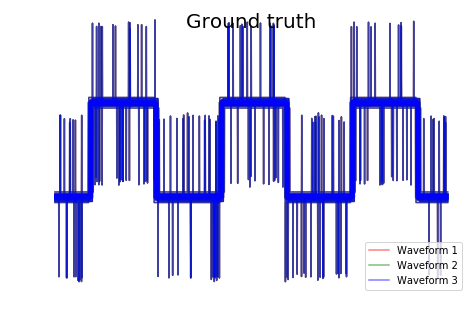

In [3]:
X = np.array(X)
y = np.array(y)

n_clusters = 3

labels = ('Waveform 1', 'Waveform 2', 'Waveform 3')

plt.figure()
plt.axes([0, 0, 1, 1])
for l, c, n in zip(range(n_clusters), 'rgb',
                   labels):
    lines = plt.plot(X[y == 1].T, c=c, alpha=.5)
    lines[0].set_label(n)

plt.legend(loc='best')
plt.axis('tight')
plt.axis('off')
plt.suptitle("Ground truth", size=20)

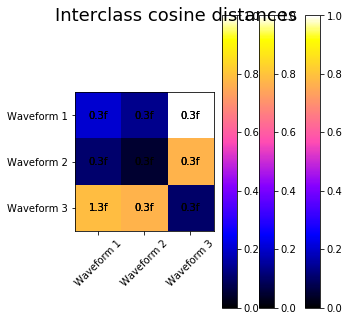

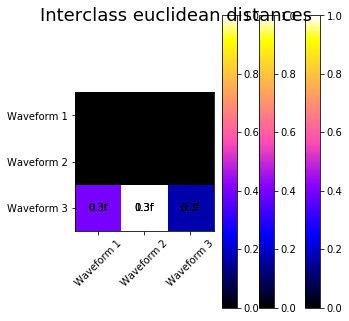

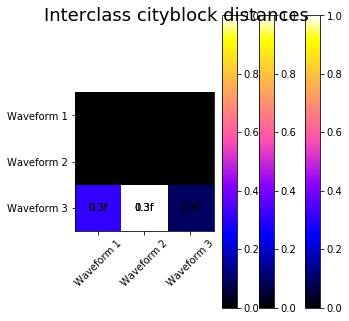

In [4]:
# Plot the distances
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j],
                                                metric=metric).mean()
        avg_dist /= avg_dist.max()
        for i in range(n_clusters):
            for j in range(n_clusters):
                plt.text(i, j, '%d.3f' % avg_dist[i, j],
                         verticalalignment = 'center',
                         horizontalalignment = 'center')
        plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2,
                   vmin=0)
        plt.xticks(range(n_clusters), labels, rotation=45)
        plt.yticks(range(n_clusters), labels)
        plt.colorbar()
        plt.suptitle("Interclass %s distances" % metric, size=18)
        plt.tight_layout()

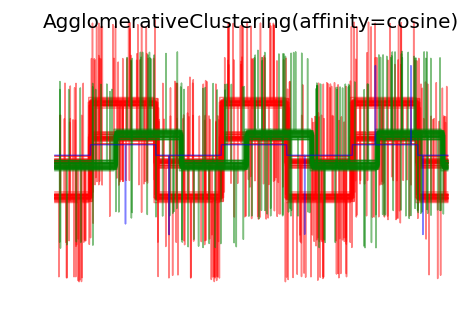

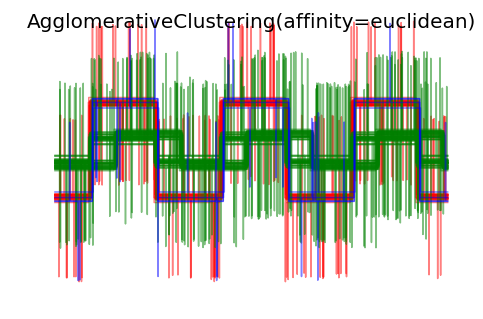

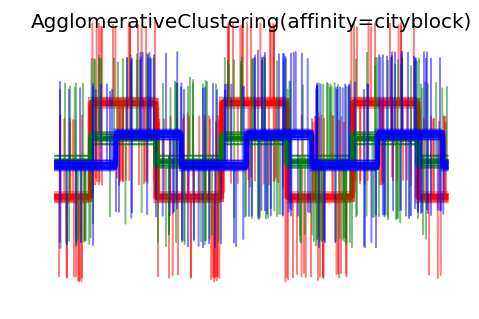

In [6]:
# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=n_clusters,
                                    linkage="average", affinity=metric)
    model.fit(X)
    plt.figure()
    plt.axes([0,0,1,1])
    for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=.5)
        plt.axis('tight')
        plt.axis('off')
        plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)

plt.show()